In [1]:
import pandas as pd
import requests
from spotify_config import spotify_headers
import numpy as np

In [2]:
# load in tracks to search on spotify
tracklist = pd.read_csv('top_edm_songs.csv')

In [3]:
tracklist.head()

,year,artist,song
0,2013,Baauer,Harlem Shake
1,2013,Daft Punk Featuring Pharrell Williams,Get Lucky
2,2013,Avicii,Wake Me Up!
3,2013,Icona Pop Featuring Charli XCX,I Love It
4,2013,Zedd Featuring Foxes,Clarity


In [4]:
def encode_spaces(string_list):
    '''Replaces spaces with %20 for Spotify API search'''
    encoded = [string.replace(" ", "%20") for string in string_list]
    return encoded

In [5]:
encoded_artist_name = encode_spaces(tracklist['artist'])
encoded_song_name = encode_spaces(tracklist['song'])

In [6]:
# Tie the strings together to form query
for artist,song in zip(encoded_artist_name,encoded_song_name):
    print(artist+"%20"+song)
    query = artist+"%20"+song
    break

base_url = f"https://api.spotify.com/v1/search?q={query}&type=track&limit=1"
print(base_url)

Baauer%20Harlem%20Shake
https://api.spotify.com/v1/search?q=Baauer%20Harlem%20Shake&type=track&limit=1


In [7]:
response = requests.get(base_url,headers=spotify_headers).json()

In [8]:
track_id = response['tracks']['items'][0]['name']
track_id

'Harlem Shake'

In [9]:
def clean_search_terms(string):
    '''Cleans up string for spotify search.'''
    cleaned = string.replace("%20Featuring%20","%20")\
    .replace("%20X%20","%20")\
    .replace("%20x%20","%20")\
    .replace("%20VS%20","%20")\
    .replace("%20VS%20","%20")\
    .replace("#","")
    return cleaned

In [10]:
track_id_list = []

for artist,song in zip(encoded_artist_name,encoded_song_name):
    print("-"*20)
    print("Searching Spotify API for...")
    print(artist.replace("%20"," "), song.replace("%20"," "))
    print("-"*20)

    artist_ = clean_search_terms(artist)
    
    query = artist_+"%20"+song
    base_url = f"https://api.spotify.com/v1/search?q={query}&type=track&limit=1"
#     print(base_url)
    
    response = requests.get(base_url,headers=spotify_headers).json()
    
    try:
        track_id = response['tracks']['items'][0]['id']
        track_name = response['tracks']['items'][0]['name']

        print(f"Results: {track_name}, id: {track_id}")
        
        track_id_list.append(track_id)   
    except:
        print(response)
        track_id_list.append(np.nan)

--------------------
Searching Spotify API for...
Baauer Harlem Shake
--------------------
Results: Harlem Shake, id: 01XFgRZfZI7oBagNf1Loml
--------------------
Searching Spotify API for...
Daft Punk Featuring Pharrell Williams Get Lucky
--------------------
Results: Get Lucky (feat. Pharrell Williams & Nile Rodgers) - Radio Edit, id: 2Foc5Q5nqNiosCNqttzHof
--------------------
Searching Spotify API for...
Avicii Wake Me Up!
--------------------
Results: Wake Me Up, id: 4h8VwCb1MTGoLKueQ1WgbD
--------------------
Searching Spotify API for...
Icona Pop Featuring Charli XCX I Love It
--------------------
Results: I Love It (feat. Charli XCX) - Original Version, id: 3VZQshi4COChhXaz7cLP02
--------------------
Searching Spotify API for...
Zedd Featuring Foxes Clarity
--------------------
Results: Clarity, id: 60wwxj6Dd9NJlirf84wr2c
--------------------
Searching Spotify API for...
will.i.am & Britney Spears Scream & Shout
--------------------
Results: Fergalicious, id: 1D066zixBwqFYqBhKgd

Results: Get Up (Rattle), id: 1zYsvExrADZ5L7Epqd5J6D
--------------------
Searching Spotify API for...
Calvin Harris Featuring Ayah Marar Thinking About You
--------------------
Results: Thinking About You (feat. Ayah Marar), id: 1KtD0xaLAikgIt5tPbteZQ
--------------------
Searching Spotify API for...
TNGHT Higher Ground
--------------------
Results: Higher Ground, id: 0Js9hB2I66nJliPIJxzn2R
--------------------
Searching Spotify API for...
Avicii Hey Brother
--------------------
Results: Hey Brother, id: 4RXpgGM7A4Hg7cFBoH5KyF
--------------------
Searching Spotify API for...
Daft Punk Give Life Back To Music
--------------------
Results: Give Life Back to Music, id: 0dEIca2nhcxDUV8C5QkPYb
--------------------
Searching Spotify API for...
Hardwell Featuring Mitch Crown Call Me A Spaceman
--------------------
Results: Call Me A Spaceman - Radio Edit, id: 1UPyhGntpIx9jGJ5UVtKVS
--------------------
Searching Spotify API for...
Kaskade Atmosphere
--------------------
Results: Atmosphere,

Results: I Can't Stop, id: 5WSL7UTa38jMWoBzObD4BD
--------------------
Searching Spotify API for...
Antoine Clamaran Featuring Fenja This is My Goodbye
--------------------
Results: This Is My Goodbye (Radio Edit USA), id: 3N2NcQcPX9w2FWM0nt52em
--------------------
Searching Spotify API for...
DJ Snake & Lil Jon Turn Down For What
--------------------
Results: Taki Taki (with Selena Gomez, Ozuna & Cardi B), id: 4w8niZpiMy6qz1mntFA5uM
--------------------
Searching Spotify API for...
Avicii Wake Me Up!
--------------------
Results: Wake Me Up, id: 4h8VwCb1MTGoLKueQ1WgbD
--------------------
Searching Spotify API for...
Calvin Harris Summer
--------------------
Results: Summer - Acoustic Cover, id: 5CRu4Emmqw7zauRtmDRXjF
--------------------
Searching Spotify API for...
Clean Bandit Featuring Jess Glynne Rather Be
--------------------
Results: Rather Be (feat. Jess Glynne), id: 3s4U7OHV7gnj42VV72eSZ6
--------------------
Searching Spotify API for...
Disclosure Featuring Sam Smith Latch


Results: All The Way, id: 0SB9oIIBgZaYdV2GrwkxbX
--------------------
Searching Spotify API for...
The Chainsmokers Featuring Siren Kanye
--------------------
{'tracks': {'href': 'https://api.spotify.com/v1/search?query=The+Chainsmokers+Siren+Kanye&type=track&offset=0&limit=1', 'items': [], 'limit': 1, 'next': None, 'offset': 0, 'previous': None, 'total': 0}}
--------------------
Searching Spotify API for...
DVBBS & Borgeous Tsunami
--------------------
Results: IDWK, id: 4ABdTWafMCXfATpILRuZFW
--------------------
Searching Spotify API for...
Flux Pavilion I Can't Stop
--------------------
Results: I Can't Stop, id: 5WSL7UTa38jMWoBzObD4BD
--------------------
Searching Spotify API for...
David Guetta Featuring Skylar Grey Shot Me Down
--------------------
Results: Shot me Down (feat. Skylar Grey) - Radio Edit, id: 7qfwcqfGOkQYtzjF4UzJHM
--------------------
Searching Spotify API for...
Dillon Francis & DJ Snake Get Low
--------------------
Results: I Like It - Dillon Francis Remix, id

Results: Say My Name (feat. Zyra), id: 1LeItUMezKA1HdCHxYICed
--------------------
Searching Spotify API for...
Disclosure Featuring Mary J. Blige F For You
--------------------
Results: F For You, id: 7blVeauN6UPeewCORqVdCD
--------------------
Searching Spotify API for...
DJ Fresh Vs. Diplo Featuring Dominique Young Unique Earthquake
--------------------
Results: Earthquake (DJ Fresh vs. Diplo) - Explicit Edit, id: 694aUybqHC8rcgzBhQ07iV
--------------------
Searching Spotify API for...
Cole Plante With Myon & Shane 54 Featuring Koko LaRoo Lie To Me
--------------------
Results: Lie to Me (with Myon & Shane 54) [feat. Koko LaRoo], id: 0cxyYjxLZ6gCdaNELztz7L
--------------------
Searching Spotify API for...
M.I.A. Y.A.L.A.
--------------------
Results: Y.A.L.A., id: 12tA6w3I4PLAHunawPPfTW
--------------------
Searching Spotify API for...
Cash Cash Surrender
--------------------
Results: Surrender, id: 3rwdcyPQ37SSsf1loOpux9
--------------------
Searching Spotify API for...
Rokelle Fea

Results: Dessert, id: 0mxoXsr14ILAYcXZBMJcOs
--------------------
Searching Spotify API for...
Jeremih Featuring Flo Rida Tonight Belongs To U!
--------------------
Results: Tonight Belongs To U!, id: 6duMPgTahOTUu2zMMqcpQM
--------------------
Searching Spotify API for...
Madonna Living For Love
--------------------
Results: Living For Love, id: 5AMuHsWAaGAZHX4p1KZWwc
--------------------
Searching Spotify API for...
Sam Feldt Featuring Kimberly Anne Show Me Love
--------------------
Results: Show Me Love - EDX Remix / Radio Edit, id: 4bAmAVdks2Y84VNVVLXFwN
--------------------
Searching Spotify API for...
Robin Schulz Featuring Ilsey Headlights
--------------------
Results: Headlights (feat. Ilsey), id: 06Hdbxh6NCy6TIhjdXTchB
--------------------
Searching Spotify API for...
Calvin Harris Featuring Big Sean Open Wide
--------------------
Results: Open Wide, id: 64j3Bd62HTe0pclk8Aq9BE
--------------------
Searching Spotify API for...
Axwell & Ingrosso Something New
-------------------

Results: Déjà vu, id: 72ojun8ufF5Y0YzssmvVHL
--------------------
Searching Spotify API for...
Gorgon City Featuring Jennifer Hudson Go All Night
--------------------
Results: Go All Night, id: 2Yhw5UiH13rDTGCeWfzK3n
--------------------
Searching Spotify API for...
Alesso Featuring Sirena Sweet Escape
--------------------
Results: Sweet Escape, id: 6vPJvkEuWZPcv58NnQ3dBR
--------------------
Searching Spotify API for...
Lil Jon Featuring Tyga Bend Ova
--------------------
Results: Bend Ova, id: 35x6JdLCr4VWWR5ShNoAWo
--------------------
Searching Spotify API for...
AlunaGeorge You Know You Like It
--------------------
Results: You Know You Like It, id: 57kR5SniQIbsbVoIjjOUDa
--------------------
Searching Spotify API for...
Zedd Featuring Bahari Addicted To A Memory
--------------------
Results: Addicted To A Memory, id: 0xTGfdrWzJLKRD4U6hxSsg
--------------------
Searching Spotify API for...
Martin Garrix & MOTi Virus (How About Now)
--------------------
Results: In the Name of Love

Results: I Like It - Dillon Francis Remix, id: 6WK7h2WfMmnX7zOZnfzoYo
--------------------
Searching Spotify API for...
Jess Glynne Hold My Hand
--------------------
Results: Hold My Hand, id: 1i1rNVtxbE7rdFfpHuNq2j
--------------------
Searching Spotify API for...
Deorro Featuring Pitbull & Elvis Crespo Bailar
--------------------
Results: Bailar, id: 1A5yplwEk6cJbAL63L6bkp
--------------------
Searching Spotify API for...
Hermitude Featuring Big K.R.I.T.  Mataya & Young Tapz The Buzz
--------------------
Results: The Buzz (feat. Big K.R.I.T., Mataya & Young Tapz) - Bonus Track, id: 6aCxdt2bMItKgGKoznDppY
--------------------
Searching Spotify API for...
Era Istrefi Bonbon
--------------------
Results: Bonbon, id: 2nHYDKaWCLNGYMPF0mNLCr
--------------------
Searching Spotify API for...
ZHU x Skrillex x THEY Working For It
--------------------
Results: Working For It - Bonus Track, id: 0P6RjFd2HgG2AXJadQuGfE
--------------------
Searching Spotify API for...
Alesso Featuring Nico & Vinz

Results: Sunset Lover, id: 0hNduWmlWmEmuwEFcYvRu1
--------------------
Searching Spotify API for...
Caravan Palace Lone Digger
--------------------
Results: Lone Digger, id: 0thLhIqWsqqycEqFONOyhu
--------------------
Searching Spotify API for...
Madden Featuring 6AM Golden Light
--------------------
Results: Golden Light (feat. 6AM), id: 3T8j0WDSw7G98rNLAe2M2X
--------------------
Searching Spotify API for...
Audien Featuring Deb's Daughter Crazy Love
--------------------
Results: Crazy Love, id: 1gwwNLcYQRnzvkBhwDjUX3
--------------------
Searching Spotify API for...
ZHU x AlunaGeorge Automatic
--------------------
Results: Automatic, id: 1NB0VPwAw6Rx8b9qvDKB5M
--------------------
Searching Spotify API for...
Jess Glynne Don't Be So Hard On Yourself
--------------------
Results: Don't Be So Hard On Yourself, id: 6jF1nHIMESqft9p33tQYPn
--------------------
Searching Spotify API for...
Tiesto + Oliver Heldens Featuring Natalie La Rose The Right Song
--------------------
Results: The R

Results: Shooting Stars, id: 0UeYCHOETPfai02uskjJ3x
--------------------
Searching Spotify API for...
Jax Jones Featuring RAYE You Don't Know Me
--------------------
Results: You Don't Know Me - Radio Edit, id: 1rFMYAZxBoAKSzXI54brMu
--------------------
Searching Spotify API for...
Martin Jensen Solo Dance
--------------------
Results: Solo Dance, id: 3R6dPfF2yBO8mHySW1XDAa
--------------------
Searching Spotify API for...
Marshmello Featuring Wrabel Ritual
--------------------
Results: Ritual (feat. Wrabel), id: 04AYgtKFrpldRXe5y0LNGQ
--------------------
Searching Spotify API for...
Flume Featuring Kai Never Be Like You
--------------------
Results: Never Be Like You (feat. Kai), id: 5WI2ltQIdwgzf1SNE76JyR
--------------------
Searching Spotify API for...
Skrillex Featuring Poo Bear Would You Ever
--------------------
Results: Would You Ever, id: 57p8CBvPOxrvyCbn6ttl5r
--------------------
Searching Spotify API for...
Selena Gomez X Marshmello Wolves
--------------------
Results: Wo

Results: Just Got Paid, id: 0v3BMLcwUmAwyqJaf5997o
--------------------
Searching Spotify API for...
The Chainsmokers Featuring Louane It Won't Kill Ya
--------------------
Results: It Won't Kill Ya, id: 5xhJmd0I15jFcEdqxfCzKk
--------------------
Searching Spotify API for...
Calvin Harris Featuring Travis Scott & A-Trak Prayers Up
--------------------
Results: Prayers Up (feat. Travis Scott & A-Trak), id: 4KaIJ1FWXUoAAnOts1YWjD
--------------------
Searching Spotify API for...
Galantis & Hook N Sling Love On Me
--------------------
Results: Runaway (U & I), id: 46lFttIf5hnUZMGvjK0Wxo
--------------------
Searching Spotify API for...
Galantis Hunter
--------------------
Results: Hunter, id: 1My0Hfu5dTCbYisBk9ZRGr
--------------------
Searching Spotify API for...
The Chainsmokers Featuring Emily Warren Don't Say
--------------------
Results: Don't Say, id: 1pJQAHpD51J7GYaFrrFO9S
--------------------
Searching Spotify API for...
Lady Gaga Featuring Beyonce Telephone
--------------------


Results: In My Mind, id: 0E9ZjEAyAwOXZ7wJC0PD33
--------------------
Searching Spotify API for...
Cash Cash Featuring Abir Finest Hour
--------------------
Results: Finest Hour (feat. Abir), id: 0p0ljM6RxgpGt7wthGqBZa
--------------------
Searching Spotify API for...
Martin Garrix & David Guetta Featuring Jamie Scott & Romy Dya So Far Away
--------------------
Results: In the Name of Love, id: 23L5CiUhw2jV1OIMwthR3S
--------------------
Searching Spotify API for...
The Chainsmokers Everybody Hates Me
--------------------
Results: Everybody Hates Me, id: 6ufrOaf4v6Qady6GiIpQ0s
--------------------
Searching Spotify API for...
Louis The Child Featuring Wafia Better Not
--------------------
Results: Better Not (with Wafia), id: 7n1940b6kHcaEewFSZXnXa
--------------------
Searching Spotify API for...
Cashmere Cat  Major Lazer & Tory Lanez Miss You
--------------------
Results: Miss You (with Major Lazer & Tory Lanez), id: 7HdZY9UJTylIiNcSDFyUDc
--------------------
Searching Spotify API fo

Results: The Spectre, id: 2DGa7iaidT5s0qnINlwMjJ
--------------------
Searching Spotify API for...
Loud Luxury x Anders Love No More
--------------------
Results: Love No More, id: 0E8WJOFs2eWD67USh7C6Qd
--------------------
Searching Spotify API for...
Gryffin Featuring Katie Pearlman Nobody Compares To You
--------------------
Results: Nobody Compares To You (feat. Katie Pearlman), id: 2Un9MGFwpGdGU9yl9KOvXx
--------------------
Searching Spotify API for...
Nicky Jam & Steve Aoki Jaleo
--------------------
Results: Te Boté - Remix, id: 3V8UKqhEK5zBkBb6d6ub8i
--------------------
Searching Spotify API for...
Steve Aoki Featuring Lil Yachty & AJR Pretender
--------------------
Results: Pretender (feat. Lil Yachty & AJR), id: 0ftAX4mbuRx6Wr6PvpAIZs
--------------------
Searching Spotify API for...
Shallou Featuring RIAH Lie
--------------------
Results: Lie, id: 6QcrReLyoun4xrPVsZ5OJE
--------------------
Searching Spotify API for...
Axwell & Ingrosso Featuring Romans Dancing Alone
----

In [20]:
print(track_id_list)

['01XFgRZfZI7oBagNf1Loml', '2Foc5Q5nqNiosCNqttzHof', '4h8VwCb1MTGoLKueQ1WgbD', '3VZQshi4COChhXaz7cLP02', '60wwxj6Dd9NJlirf84wr2c', '1D066zixBwqFYqBhKgdPzp', '0Hf4aIJpsN4Os2f0y0VqWl', '2Zj4FUsMtu9PMuJsHbGbdv', '05SBRd4fXgn8FX7bf8BCAE', '2V65y3PX4DkRhy1djlxd9p', '2nMeu6UenVvwUktBCpLMK9', '24LS4lQShWyixJ0ZrJXfJ5', nan, '6bMFghbCmXgMjEVM7vtZXm', '2SHnUyZq0zwmvRIl4WY77G', '03UrZgTINDqvnUMbbIMhql', '3KliPMvk1EvFZu9cvkj8p1', '28OX5qT45GZBuu8CNKBOj6', '4REEbsJ6WV9NoGubnlhnkm', '4jCJDQiiLMTh3ix6dXqfvo', '2QD4C6RRHgRNRAyrfnoeAo', '2QtJA4gbwe1AcanB2p21aP', '5GjnIpUlLGEIYk052ISOw9', '2FHdoPa5aWaAmjuf362KJ0', '6JEntXLt4z98CcDtIH9sU7', '2q2IvYjfidmDUXag3batKZ', '591nHHHzZl1NLt9PMKpinM', '5CMjjywI0eZMixPeqNd75R', '4e3RCQgj1P4Fa7d86y2qT2', '1mz9ZrRYu3EPVg9ZHFtjjf', '1Ejsu5JglwIgrFW7Bt2GuL', '457p7UH7hoHrbA2iI4PSCA', '7aLemVaGw5bt4u7wPXm7Lm', '15iosIuxC3C53BgsM5Uggs', '5rb9QrpfcKFHM1EUbSIurX', '4X06LeyOO0NZoqOowDmp3a', '5fPFPo5DI4lDu99KYPeBQ5', '36c4JohayB9qd64eidQMBi', nan, '1dFkD1JfRMzwO6hwUsE8aS', '

In [21]:
tracklist['track_id'] = track_id_list
tracklist.head()

,year,artist,song,track_id
0,2013,Baauer,Harlem Shake,01XFgRZfZI7oBagNf1Loml
1,2013,Daft Punk Featuring Pharrell Williams,Get Lucky,2Foc5Q5nqNiosCNqttzHof
2,2013,Avicii,Wake Me Up!,4h8VwCb1MTGoLKueQ1WgbD
3,2013,Icona Pop Featuring Charli XCX,I Love It,3VZQshi4COChhXaz7cLP02
4,2013,Zedd Featuring Foxes,Clarity,60wwxj6Dd9NJlirf84wr2c


In [22]:
tracklist[tracklist['track_id'].isna()]

,year,artist,song,track_id
12,2013,will.i.am Featuring Justin Bieber,#thatPOWER,NaN
38,2013,Cazzette,Beam Me Up (Kill-Mode),NaN
78,2013,Ono,Walking On Thin Ice 2013,NaN
93,2013,Team Pitbull Featuring David Rush & Pitbull,All Night,NaN
112,2014,The Chainsmokers,#SELFIE,NaN
132,2014,Lillywood & Robin Schulz,Prayer In C,NaN
135,2014,Skrillex With Kill The Noise Fatman Scoop & M...,Recess,NaN
146,2014,The Chainsmokers Featuring Siren,Kanye,NaN
164,2014,Skrillex With Ragga Twins,Ragga Bomb,NaN
181,2014,Seven Lions With Myon & Shane 54 Featuring Tov...,Strangers,NaN


In [27]:
for track in tracklist['track_id']:
    response = requests.get(f"https://api.spotify.com/v1/audio-features/{track}",headers=spotify_headers).json()
    print(track)
    print(response)
    break    

01XFgRZfZI7oBagNf1Loml
{'danceability': 0.452, 'energy': 0.794, 'key': 0, 'loudness': -5.151, 'mode': 1, 'speechiness': 0.0483, 'acousticness': 0.0111, 'instrumentalness': 0.00182, 'liveness': 0.416, 'valence': 0.282, 'tempo': 137.825, 'type': 'audio_features', 'id': '01XFgRZfZI7oBagNf1Loml', 'uri': 'spotify:track:01XFgRZfZI7oBagNf1Loml', 'track_href': 'https://api.spotify.com/v1/tracks/01XFgRZfZI7oBagNf1Loml', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/01XFgRZfZI7oBagNf1Loml', 'duration_ms': 196664, 'time_signature': 4}


In [43]:
data = []
for song,track in zip(tracklist['song'], tracklist['track_id']):

    print("-"*20)
    print(f"Getting song features for {song}...")
    print("-"*20)

    response = requests.get(f"https://api.spotify.com/v1/audio-features/{track}",headers=spotify_headers).json()

    data.append(response)    

--------------------
Getting song features for Harlem Shake...
--------------------
--------------------
Getting song features for Get Lucky...
--------------------
--------------------
Getting song features for Wake Me Up!...
--------------------
--------------------
Getting song features for I Love It...
--------------------
--------------------
Getting song features for Clarity...
--------------------
--------------------
Getting song features for Scream & Shout...
--------------------
--------------------
Getting song features for Feel This Moment...
--------------------
--------------------
Getting song features for Applause...
--------------------
--------------------
Getting song features for I Need Your Love...
--------------------
--------------------
Getting song features for Don't You Worry Child...
--------------------
--------------------
Getting song features for Summertime Sadness...
--------------------
--------------------
Getting song features for Sweet Nothing...
---

--------------------
Getting song features for This is My Goodbye...
--------------------
--------------------
Getting song features for Turn Down For What...
--------------------
--------------------
Getting song features for Wake Me Up!...
--------------------
--------------------
Getting song features for Summer...
--------------------
--------------------
Getting song features for Rather Be...
--------------------
--------------------
Getting song features for Latch...
--------------------
--------------------
Getting song features for Break Free...
--------------------
--------------------
Getting song features for Hey Brother...
--------------------
--------------------
Getting song features for Animals...
--------------------
--------------------
Getting song features for Stay The Night...
--------------------
--------------------
Getting song features for A Sky Full Of Stars...
--------------------
--------------------
Getting song features for Applause...
--------------------


--------------------
Getting song features for Just Girly Things...
--------------------
--------------------
Getting song features for Higher...
--------------------
--------------------
Getting song features for Lean On...
--------------------
--------------------
Getting song features for Where Are U Now...
--------------------
--------------------
Getting song features for Hey Mama...
--------------------
--------------------
Getting song features for You Know You Like It...
--------------------
--------------------
Getting song features for Waves...
--------------------
--------------------
Getting song features for Outside...
--------------------
--------------------
Getting song features for Prayer In C...
--------------------
--------------------
Getting song features for Blame...
--------------------
--------------------
Getting song features for How Deep Is Your Love...
--------------------
--------------------
Getting song features for I Want You To Know...
-----------------

--------------------
Getting song features for Middle...
--------------------
--------------------
Getting song features for Ghost...
--------------------
--------------------
Getting song features for Insomnia...
--------------------
--------------------
Getting song features for Don't Let Me Down...
--------------------
--------------------
Getting song features for Closer...
--------------------
--------------------
Getting song features for This Is What You Came For...
--------------------
--------------------
Getting song features for Cold Water...
--------------------
--------------------
Getting song features for Roses...
--------------------
--------------------
Getting song features for Never Forget You...
--------------------
--------------------
Getting song features for Let Me Love You...
--------------------
--------------------
Getting song features for Never Be Like You...
--------------------
--------------------
Getting song features for Middle...
--------------------


--------------------
Getting song features for It's Strange...
--------------------
--------------------
Getting song features for Love$ick...
--------------------
--------------------
Getting song features for Love On Me...
--------------------
--------------------
Getting song features for La La Land...
--------------------
--------------------
Getting song features for Something Just Like This...
--------------------
--------------------
Getting song features for Closer...
--------------------
--------------------
Getting song features for Stay...
--------------------
--------------------
Getting song features for It Ain't Me...
--------------------
--------------------
Getting song features for Let Me Love You...
--------------------
--------------------
Getting song features for Rockabye...
--------------------
--------------------
Getting song features for Paris...
--------------------
--------------------
Getting song features for Slide...
--------------------
------------------

--------------------
Getting song features for Trouble...
--------------------
--------------------
Getting song features for Creatures Of The Night...
--------------------
--------------------
Getting song features for Take My Breath Away...
--------------------
--------------------
Getting song features for The Middle...
--------------------
--------------------
Getting song features for Wolves...
--------------------
--------------------
Getting song features for Something Just Like This...
--------------------
--------------------
Getting song features for One Kiss...
--------------------
--------------------
Getting song features for Silence...
--------------------
--------------------
Getting song features for Let Me Go...
--------------------
--------------------
Getting song features for Happier...
--------------------
--------------------
Getting song features for Jackie Chan...
--------------------
--------------------
Getting song features for Solo...
--------------------
--

--------------------
Getting song features for Falls...
--------------------
--------------------
Getting song features for High...
--------------------


In [44]:
df = pd.DataFrame(data)
print(data)

[{'danceability': 0.452, 'energy': 0.794, 'key': 0, 'loudness': -5.151, 'mode': 1, 'speechiness': 0.0483, 'acousticness': 0.0111, 'instrumentalness': 0.00182, 'liveness': 0.416, 'valence': 0.282, 'tempo': 137.825, 'type': 'audio_features', 'id': '01XFgRZfZI7oBagNf1Loml', 'uri': 'spotify:track:01XFgRZfZI7oBagNf1Loml', 'track_href': 'https://api.spotify.com/v1/tracks/01XFgRZfZI7oBagNf1Loml', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/01XFgRZfZI7oBagNf1Loml', 'duration_ms': 196664, 'time_signature': 4}, {'danceability': 0.794, 'energy': 0.811, 'key': 6, 'loudness': -8.966, 'mode': 0, 'speechiness': 0.038, 'acousticness': 0.0426, 'instrumentalness': 1.07e-06, 'liveness': 0.101, 'valence': 0.862, 'tempo': 116.047, 'type': 'audio_features', 'id': '2Foc5Q5nqNiosCNqttzHof', 'uri': 'spotify:track:2Foc5Q5nqNiosCNqttzHof', 'track_href': 'https://api.spotify.com/v1/tracks/2Foc5Q5nqNiosCNqttzHof', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2Foc5Q5nqNiosCNqttzHof', 'd

In [45]:
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.01110,https://api.spotify.com/v1/audio-analysis/01XF...,0.452,196664.0,0.794,NaN,01XFgRZfZI7oBagNf1Loml,0.001820,0.0,0.4160,-5.151,1.0,0.0483,137.825,4.0,https://api.spotify.com/v1/tracks/01XFgRZfZI7o...,audio_features,spotify:track:01XFgRZfZI7oBagNf1Loml,0.282
1,0.04260,https://api.spotify.com/v1/audio-analysis/2Foc...,0.794,248413.0,0.811,NaN,2Foc5Q5nqNiosCNqttzHof,0.000001,6.0,0.1010,-8.966,0.0,0.0380,116.047,4.0,https://api.spotify.com/v1/tracks/2Foc5Q5nqNio...,audio_features,spotify:track:2Foc5Q5nqNiosCNqttzHof,0.862
2,0.00346,https://api.spotify.com/v1/audio-analysis/4h8V...,0.518,247427.0,0.784,NaN,4h8VwCb1MTGoLKueQ1WgbD,0.001870,2.0,0.1710,-5.659,1.0,0.0524,124.102,4.0,https://api.spotify.com/v1/tracks/4h8VwCb1MTGo...,audio_features,spotify:track:4h8VwCb1MTGoLKueQ1WgbD,0.588
3,0.00855,https://api.spotify.com/v1/audio-analysis/3VZQ...,0.714,155337.0,0.905,NaN,3VZQshi4COChhXaz7cLP02,0.000025,8.0,0.1460,-2.663,1.0,0.0289,125.927,4.0,https://api.spotify.com/v1/tracks/3VZQshi4COCh...,audio_features,spotify:track:3VZQshi4COChhXaz7cLP02,0.838
4,0.03980,https://api.spotify.com/v1/audio-analysis/60ww...,0.509,271427.0,0.781,NaN,60wwxj6Dd9NJlirf84wr2c,0.000000,8.0,0.0749,-3.480,1.0,0.0720,128.000,4.0,https://api.spotify.com/v1/tracks/60wwxj6Dd9NJ...,audio_features,spotify:track:60wwxj6Dd9NJlirf84wr2c,0.176


In [126]:
# inner join features on track list.
merged = tracklist.merge(df, how="inner", left_on='track_id',right_on='id')\
        .drop_duplicates("track_id")\
        .reset_index(drop=True)

In [127]:
merged.head()

,year,artist,song,track_id,acousticness,analysis_url,danceability,duration_ms,energy,error,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,2013,Baauer,Harlem Shake,01XFgRZfZI7oBagNf1Loml,0.01110,https://api.spotify.com/v1/audio-analysis/01XF...,0.452,196664.0,0.794,NaN,...,0.4160,-5.151,1.0,0.0483,137.825,4.0,https://api.spotify.com/v1/tracks/01XFgRZfZI7o...,audio_features,spotify:track:01XFgRZfZI7oBagNf1Loml,0.282
1,2013,Daft Punk Featuring Pharrell Williams,Get Lucky,2Foc5Q5nqNiosCNqttzHof,0.04260,https://api.spotify.com/v1/audio-analysis/2Foc...,0.794,248413.0,0.811,NaN,...,0.1010,-8.966,0.0,0.0380,116.047,4.0,https://api.spotify.com/v1/tracks/2Foc5Q5nqNio...,audio_features,spotify:track:2Foc5Q5nqNiosCNqttzHof,0.862
2,2013,Avicii,Wake Me Up!,4h8VwCb1MTGoLKueQ1WgbD,0.00346,https://api.spotify.com/v1/audio-analysis/4h8V...,0.518,247427.0,0.784,NaN,...,0.1710,-5.659,1.0,0.0524,124.102,4.0,https://api.spotify.com/v1/tracks/4h8VwCb1MTGo...,audio_features,spotify:track:4h8VwCb1MTGoLKueQ1WgbD,0.588
3,2013,Icona Pop Featuring Charli XCX,I Love It,3VZQshi4COChhXaz7cLP02,0.00855,https://api.spotify.com/v1/audio-analysis/3VZQ...,0.714,155337.0,0.905,NaN,...,0.1460,-2.663,1.0,0.0289,125.927,4.0,https://api.spotify.com/v1/tracks/3VZQshi4COCh...,audio_features,spotify:track:3VZQshi4COChhXaz7cLP02,0.838
4,2013,Zedd Featuring Foxes,Clarity,60wwxj6Dd9NJlirf84wr2c,0.03980,https://api.spotify.com/v1/audio-analysis/60ww...,0.509,271427.0,0.781,NaN,...,0.0749,-3.480,1.0,0.0720,128.000,4.0,https://api.spotify.com/v1/tracks/60wwxj6Dd9NJ...,audio_features,spotify:track:60wwxj6Dd9NJlirf84wr2c,0.176


In [128]:
merged['tempo']= round(merged['tempo'])

In [129]:
merged['tempo'].value_counts()

128.0    78
126.0    23
125.0    23
130.0    21
100.0    19
105.0    16
120.0    13
124.0    12
123.0    11
122.0     9
115.0     9
121.0     8
110.0     8
142.0     8
103.0     7
119.0     7
118.0     7
145.0     7
135.0     6
116.0     6
102.0     6
108.0     6
113.0     6
127.0     5
150.0     5
140.0     5
99.0      4
92.0      4
170.0     4
104.0     4
         ..
178.0     1
131.0     1
194.0     1
133.0     1
175.0     1
70.0      1
80.0      1
157.0     1
149.0     1
180.0     1
147.0     1
89.0      1
156.0     1
200.0     1
176.0     1
141.0     1
196.0     1
146.0     1
111.0     1
117.0     1
195.0     1
93.0      1
164.0     1
74.0      1
88.0      1
83.0      1
75.0      1
192.0     1
174.0     1
138.0     1
Name: tempo, Length: 83, dtype: int64

In [130]:
# highest liveness score
merged[merged['liveness']==max(merged['liveness'])]

,year,artist,song,track_id,acousticness,analysis_url,danceability,duration_ms,energy,error,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
79,2013,Kerli,The Lucky Ones,3iTIdHZuiIFecxfe5vq1QI,0.0294,https://api.spotify.com/v1/audio-analysis/3iTI...,0.44,234027.0,0.88,NaN,...,0.957,-1.904,1.0,0.081,128.0,4.0,https://api.spotify.com/v1/tracks/3iTIdHZuiIFe...,audio_features,spotify:track:3iTIdHZuiIFecxfe5vq1QI,0.254


In [131]:
# highest energy songs by year.
high_energy = pd.DataFrame(merged.groupby('year')['energy'].max())
low_energy = pd.DataFrame(merged.groupby('year')['energy'].min())

In [132]:
# print songs where energy is the max
for year, energy in zip(high_energy.index, high_energy['energy']):
    print(year, merged[(merged['year']==year) & (merged['energy']==energy)]['song'])
    
print("_"*10)

for year, energy in zip(low_energy.index, low_energy['energy']):
    print(year, merged[(merged['year']==year) & (merged['energy']==energy)]['song'])

2013 45    Get Up (Rattle)
Name: song, dtype: object
2014 110    Bend Ova
Name: song, dtype: object
2015 216    Out The Speakers
Name: song, dtype: object
2016 288    Paradise
289    Red Lips
Name: song, dtype: object
2017 341    Feel Good
Name: song, dtype: object
2018 403    Azukita
Name: song, dtype: object
__________
2013 10    Summertime Sadness
Name: song, dtype: object
2014 126    You & Me
Name: song, dtype: object
2015 224    Nothing Really Matters
Name: song, dtype: object
2016 282    Smoke Filled Room
Name: song, dtype: object
2017 322    The One
Name: song, dtype: object
2018 428    Lie
Name: song, dtype: object


In [100]:
import seaborn as sns

In [133]:
merged.head()
sns.set()

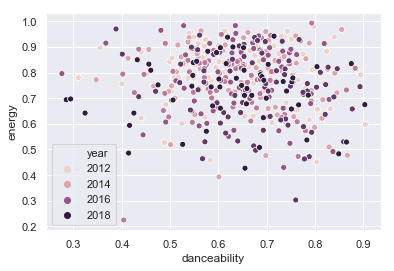

In [134]:
# danceability vs energy
sns.scatterplot(x=merged['danceability'],y=merged['energy'],hue=merged['year'])

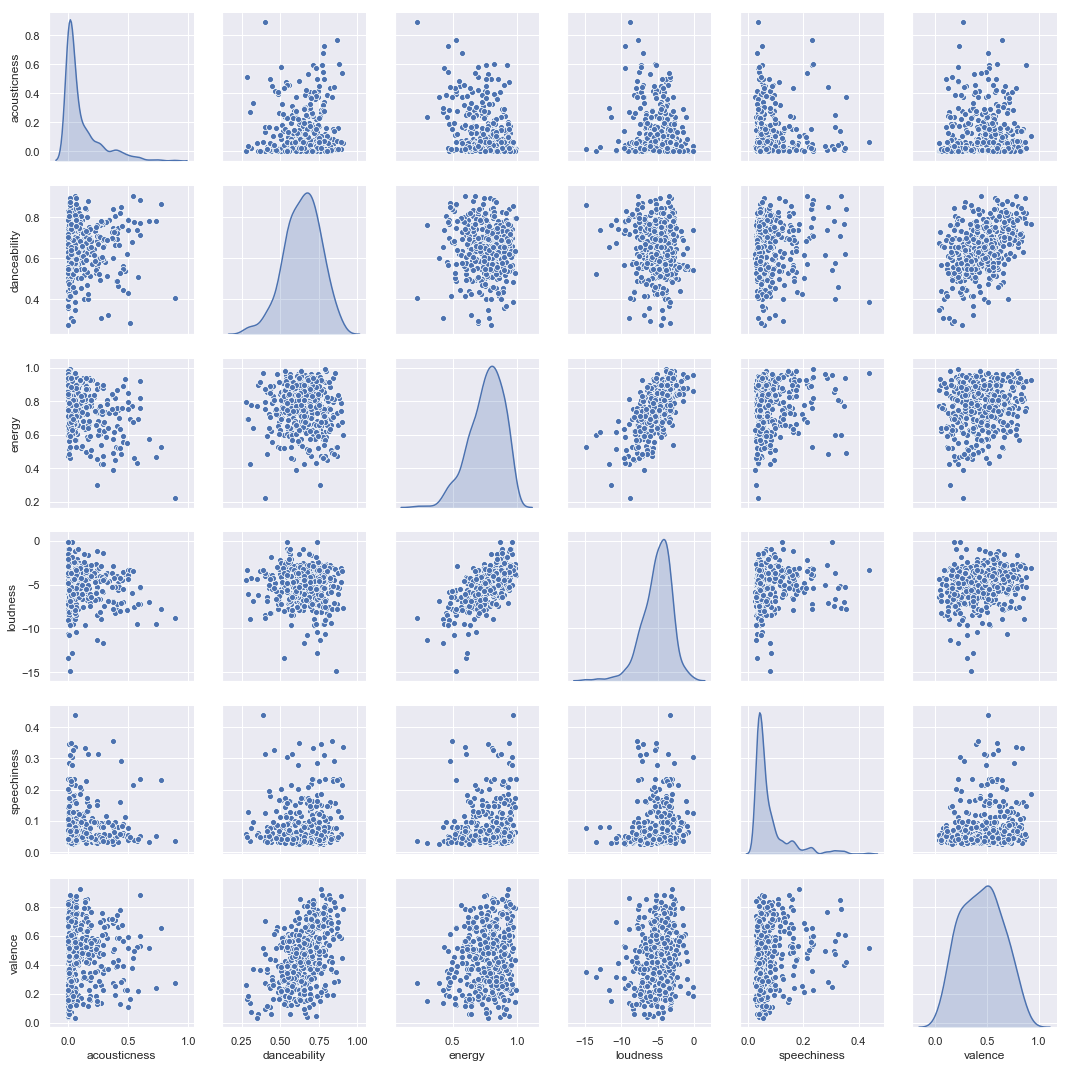

In [143]:
cols = ['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'valence']
# sns.scatterplot(x=merged['danceability'],y=merged['energy'],hue=merged['year'])
sns.pairplot(data=merged[cols].dropna(), diag_kind='kde')

In [144]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [169]:
# making 3d plot for EDM tracks from 2013 to now.

trace1 = go.Scatter3d(
    x=merged['danceability'],
    y=merged['energy'],
    z=merged['loudness'],
    mode='markers',
    marker=dict(
        size=5,
        colorscale="Viridis",
        line=dict(
            width=0.1),
        opacity=.5
    ),
    text=[f'Title: {song}<br>Artist: {artist}' for song,artist in zip(merged['song'],merged['artist'])]
)

layout = go.Layout(
    title="EDM Features",
    xaxis=dict(title='Date'),
    yaxis=dict(title='placeholder'),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

data = [trace1]

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)